# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/ericness/anaconda3/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

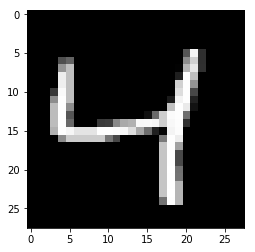

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
tensor_size = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, tensor_size))
targets_ = tf.placeholder(tf.float32, shape=(None, tensor_size))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, tensor_size)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6955
Epoch: 1/20... Training loss: 0.6921
Epoch: 1/20... Training loss: 0.6894
Epoch: 1/20... Training loss: 0.6861
Epoch: 1/20... Training loss: 0.6822
Epoch: 1/20... Training loss: 0.6778
Epoch: 1/20... Training loss: 0.6721
Epoch: 1/20... Training loss: 0.6649
Epoch: 1/20... Training loss: 0.6562
Epoch: 1/20... Training loss: 0.6472
Epoch: 1/20... Training loss: 0.6349
Epoch: 1/20... Training loss: 0.6229
Epoch: 1/20... Training loss: 0.6077
Epoch: 1/20... Training loss: 0.5925
Epoch: 1/20... Training loss: 0.5745
Epoch: 1/20... Training loss: 0.5560
Epoch: 1/20... Training loss: 0.5382
Epoch: 1/20... Training loss: 0.5204
Epoch: 1/20... Training loss: 0.5023
Epoch: 1/20... Training loss: 0.4777
Epoch: 1/20... Training loss: 0.4624
Epoch: 1/20... Training loss: 0.4451
Epoch: 1/20... Training loss: 0.4297
Epoch: 1/20... Training loss: 0.4143
Epoch: 1/20... Training loss: 0.4023
Epoch: 1/20... Training loss: 0.3834
Epoch: 1/20... Training loss: 0.3732
E

Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.2022
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.1957
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1861
E

Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1649
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1458
E

Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1282
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1304
E

Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1210
E

Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1166
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1158
E

Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1106
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1117
E

Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1001
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1050
E

Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1057
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0985
E

Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0967
E

Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.1049
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1016
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0970
E

Epoch: 10/20... Training loss: 0.0911
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0999
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.1002
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0894
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0863
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0891
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0888
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0984
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0991
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0974
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0981
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0980
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0980
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0875
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

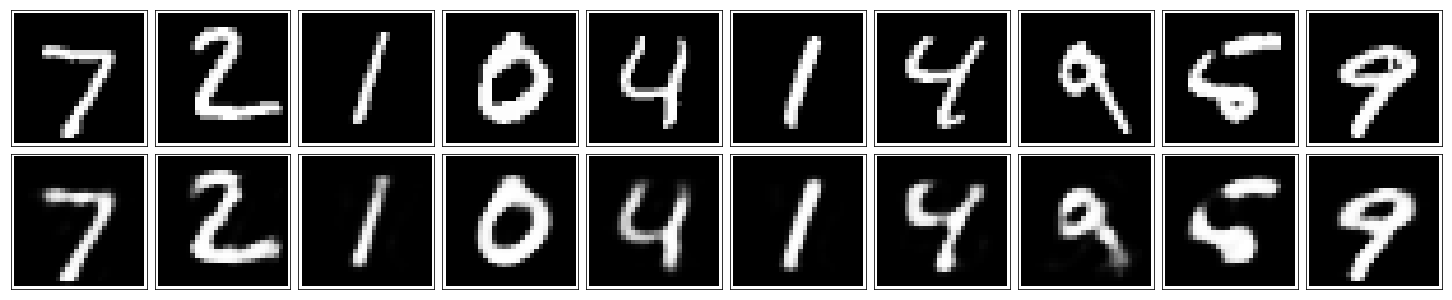

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [13]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.